In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
#!pip install librosa tensorflow pandas scikit-learn

In [3]:
#import necessary libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import IPython.display as ipd
import shutil
import numpy as np

In [4]:
#load the training dataset
train_df=pd.read_csv('/content/drive/MyDrive/techcabal-ewe-audio-translation-challenge20240903-4068-o1ckqz/Train.csv')

In [5]:
train_df

,id,audio_filepath,duration,class
0,id_6nazjwygdl,id_6nazjwygdl.wav,1.984,left
1,id_jpwl97yilf,id_jpwl97yilf.wav,2.027,down
2,id_9d131fb32p,id_9d131fb32p.wav,2.274,go
3,id_kat2oty4s0,id_kat2oty4s0.wav,2.176,down
4,id_g3hvae3jbe,id_g3hvae3jbe.wav,1.634,down
...,...,...,...,...
5329,id_oacj1nszqs,id_oacj1nszqs.wav,2.274,down
5330,id_1rzy0orohi,id_1rzy0orohi.wav,1.578,yes
5331,id_qoyl8ta4it,id_qoyl8ta4it.wav,1.278,go
5332,id_h16jo3nz71,id_h16jo3nz71.wav,1.664,yes


In [6]:
#check the empty values
train_df.isnull().sum()

,0
id,0
audio_filepath,0
duration,0
class,0


In [7]:
#display the statistical summary
train_df.describe()

,duration
count,5334.000000
mean,1.844375
std,0.436861
min,1.077833
25%,1.554000
50%,1.899000
75%,2.133000
max,2.998000


In [8]:
#display the number of values present in each class column
train_df['class'].value_counts()

,count
class,
go,759
down,665
stop,655
left,651
right,651
up,651
yes,651
no,651


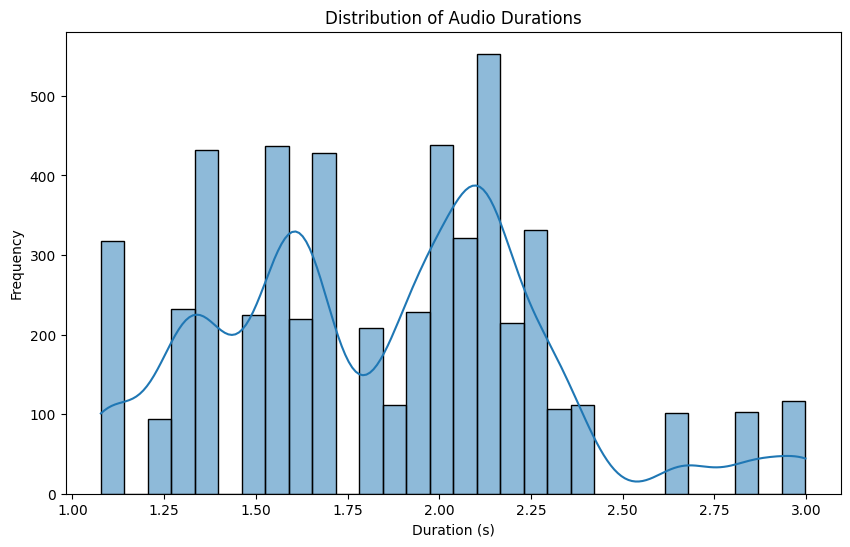

In [9]:
# Plot the distribution of audio durations
plt.figure(figsize=(10, 6))
sns.histplot(train_df['duration'], bins=30, kde=True)
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (s)')
plt.ylabel('Frequency')
plt.show()



```
Over 500 audio files lasting 2.20 seconds.
```



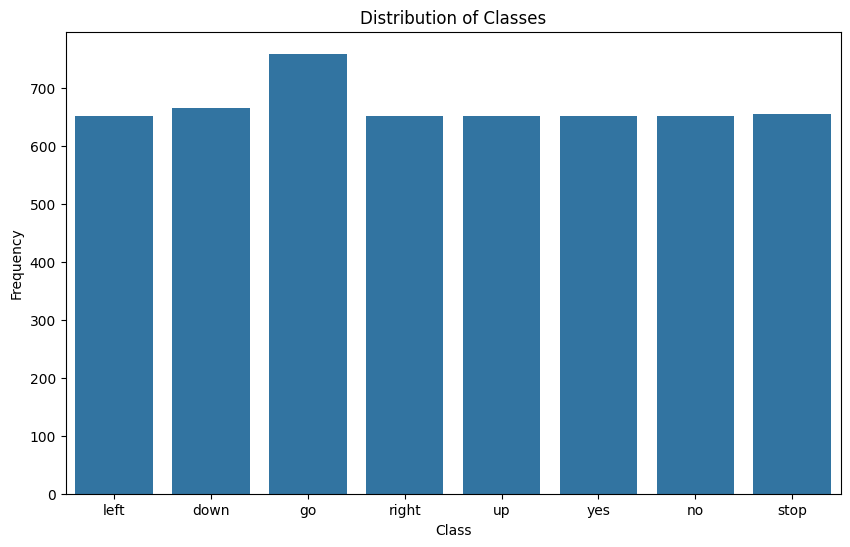

In [10]:
# Plot the distribution of classes
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=train_df)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()



```
The 'go' category has the highest number of audio files, followed by the 'down' category, with the remaining categories having
relatively equal number.
```



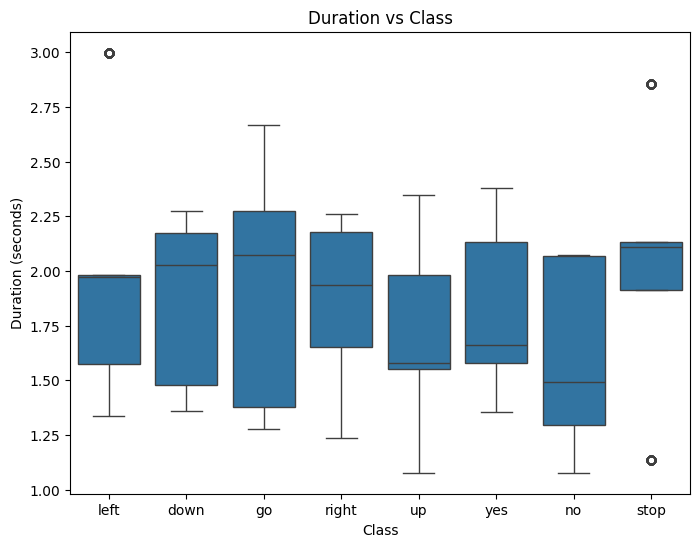

In [11]:
# Scatter plot of duration vs class
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='duration', data=train_df)
plt.title('Duration vs Class')
plt.xlabel('Class')
plt.ylabel('Duration (seconds)')
plt.show()



```

There are some outliers in the 'stop' and 'left' classes, suggesting that there are instances where the duration was significantly different
from the majority of data points.These outliers could be the result of misclassifications,noise, or variability in speech patterns.

The median duration for the commands 'down', 'go', and 'right' is relatively higher compared to the others.The command 'stop' and 'left'
has the smallest variation but its median is also relatively high.

The command 'no' shows the largest range in durations, with both the shortest and longest recorded durations.

```



In [12]:
test_df=pd.read_csv('/content/drive/MyDrive/techcabal-ewe-audio-translation-challenge20240903-4068-o1ckqz/Test_1.csv')

In [13]:
test_df

,id,audio_filepath,duration
0,id_u5iqtgjzhx,id_u5iqtgjzhx.wav,2.35800
1,id_l7ebzcfk5e,id_l7ebzcfk5e.wav,3.22100
2,id_jbzci8uepl,id_jbzci8uepl.wav,2.94898
3,id_jzil0fw5vs,id_jzil0fw5vs.wav,4.33100
4,id_o7mrvf5wj7,id_o7mrvf5wj7.wav,1.85600
...,...,...,...
2941,id_gx8hrglpc9,id_gx8hrglpc9.wav,1.33800
2942,id_9bxbutuh8z,id_9bxbutuh8z.wav,1.98400
2943,id_d0tudlf5gn,id_d0tudlf5gn.wav,1.33800
2944,id_xuwlsfztrd,id_xuwlsfztrd.wav,2.17800


In [14]:
test_df.isnull().sum()

,0
id,0
audio_filepath,0
duration,0


move audio files to local

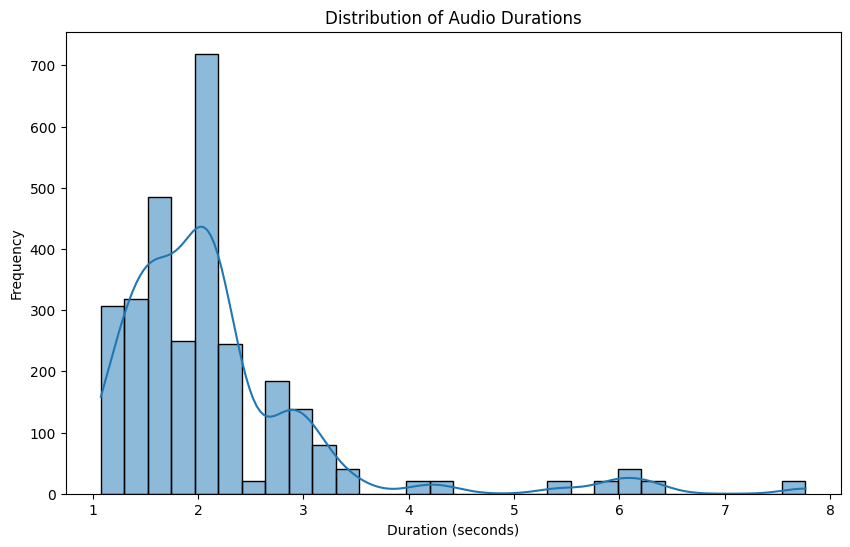

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of audio durations
plt.figure(figsize=(10, 6))
sns.histplot(test_df['duration'], bins=30, kde=True)
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

Move all the training and testing audios from google drive to local drive and save them in new file


In [16]:
# # Define paths
# shared_audio_directory = '/content/drive/MyDrive/TechCabal Ewe Audio Files'
# local_audio_directory = '/content/drive/MyDrive/Local_TechCabal_Ewe_Audio_Files'
# final_directory = '/content/drive/MyDrive/Final_TechCabal_Ewe_Audio_Files'

# # Copy the shared folder to the local directory
# shutil.copytree(shared_audio_directory, local_audio_directory, dirs_exist_ok=True)
# print(f"Local copy created at: {local_audio_directory}")

# # Move the folder to the final destination
# shutil.move(local_audio_directory, final_directory)
# print(f"Folder moved to: {final_directory}")

# # Verification
# local_files = os.listdir(final_directory)
# print("Files in final directory:", local_files)

In [17]:
# # Define paths
# shared_test_audio_directory = '/content/drive/MyDrive/test_2'
# local_test_audio_directory = '/content/drive/MyDrive/Local_test_2'
# final_test_directory = '/content/drive/MyDrive/Final_test_2'

# # Copy the shared folder to the local directory
# shutil.copytree(shared_test_audio_directory, local_test_audio_directory, dirs_exist_ok=True)
# print(f"Local copy created at: {local_test_audio_directory}")

# # Move the folder to the final destination
# shutil.move(local_test_audio_directory, final_test_directory)
# print(f"Folder moved to: {final_test_directory}")

# # Verification
# local_test_files = os.listdir(final_test_directory)
# print("Files in final directory:", local_test_files)

check number of audios in the audio directory

In [18]:
# Directory containing audio files
audio_directory = '/content/drive/MyDrive/Final_TechCabal_Ewe_Audio_Files'

# List all files in the directory
audio_files = os.listdir(audio_directory)

# Display the audio files
num_audios=len(audio_files)
num_audios

8280

In [19]:
# Specify the directory containing audio files as training audio directory
train_audio_directory = '/content/drive/MyDrive/Final_TechCabal_Ewe_Audio_Files'

# Extract file names from the dataset
file_names = train_df['audio_filepath'].apply(lambda x: os.path.basename(x))

# Get a list of all files in the audio directory
train_existing_files = set(os.listdir(train_audio_directory))

In [20]:
# Find missing files
train_missing_files = [file_name for file_name in file_names if file_name not in train_existing_files]

In [21]:
# Count the number of missing files
num_missing_files = len(train_missing_files)

# Print the number of missing files
print(f"Number of missing audio files: {num_missing_files}")

Number of missing audio files: 0


In [22]:
# Directory containing additional testing audio files
test_audio_directory = '/content/drive/MyDrive/Final_test_2'

# List all files in the directory
test_audio_files = os.listdir(test_audio_directory)
# Display the audio files
num_audios=len(test_audio_files)
num_audios

660

In [23]:
# Extract file names from the dataset
file_names = test_df['audio_filepath'].apply(lambda x: os.path.basename(x))

# Get a list of all files in the audio directory
test_existing_files = set(os.listdir(test_audio_directory))

In [24]:
# Find missing files
test_missing_files = [file_name for file_name in file_names if file_name not in test_existing_files]

In [25]:
# Count the number of missing files
num_missing_files = len(test_missing_files)

# Print the number of missing files
print(f"Number of missing audio files: {num_missing_files}")

Number of missing audio files: 2286


check common audio files

In [26]:
# # List all audio files in both directories
# audio_files = set(os.listdir(audio_directory))
# test_audio_files = set(os.listdir(test_audio_directory))

# # Find the common files between the two directories
# common_files = audio_files.intersection(test_audio_files)

# # Output the number of common audio files
# print(f"Number of common audio files: {len(common_files)}")

# # Optionally, print the common files' names
# print("Common audio files:", common_files)



```
since there are 660 common audios, they replaced those in the final audio directory to update it.
```



replacing common audios in audio files with the one from testing audio

In [27]:
# # Replace the common audio files in audio_directory with the ones from test_audio_directory
# for file_name in common_files:
#     # Full path of the file in both directories
#     audio_file_path = os.path.join(audio_directory, file_name)
#     test_audio_file_path = os.path.join(test_audio_directory, file_name)

#     try:
#         # Copy the file from test_audio_directory to audio_directory, overwriting the existing file
#         shutil.copy2(test_audio_file_path, audio_file_path)
#         print(f"Replaced '{file_name}' successfully.")
#     except Exception as e:
#         print(f"Failed to replace '{file_name}': {e}")

# # Summary
# print(f"Number of common audio files replaced: {len(common_files)}")

save updated audio file on drive

In [28]:
# drive_save_directory = '/content/drive/MyDrive/Updated_Audio_Directory'  # Save location in Drive
# # Save the updated directory to Google Drive
# try:
#     shutil.copytree(audio_directory, drive_save_directory, dirs_exist_ok=True)
#     print(f"Saved updated files to Google Drive at {drive_save_directory}")
# except Exception as e:
#     print(f"Error saving to Google Drive: {e}")

In [29]:
# Directory containing audio files
final_audio_directory = '/content/drive/MyDrive/Updated_Audio_Directory'

# List all files in the directory
final_audio_files = os.listdir(final_audio_directory)
# Display the audio files
num_audios=len(final_audio_files)
num_audios

8280

Confirm that no missing audios

In [30]:
# Specify the directory containing audio files
training_audio_directory = '/content/drive/MyDrive/Updated_Audio_Directory'

# Extract file names from the dataset
file_names = train_df['audio_filepath'].apply(lambda x: os.path.basename(x))

# Get a list of all files in the audio directory
training_existing_files = set(os.listdir(training_audio_directory))

# Find missing files
training_missing_files = [file_name for file_name in file_names if file_name not in training_existing_files]
# Count the number of missing files
training_num_missing_files = len(training_missing_files)

# Print the number of missing files
print(f"Number of missing audio files: {training_num_missing_files}")

Number of missing audio files: 0


In [31]:
# Specify the directory containing audio files
testing_audio_directory = '/content/drive/MyDrive/Updated_Audio_Directory'

# Extract file names from the dataset
file_names = test_df['audio_filepath'].apply(lambda x: os.path.basename(x))

# Get a list of all files in the audio directory
testing_existing_files = set(os.listdir(testing_audio_directory))

# Find missing files
testing_missing_files = [file_name for file_name in file_names if file_name not in testing_existing_files]
# Count the number of missing files
testing_num_missing_files = len(testing_missing_files)

# Print the number of missing files
print(f"Number of missing audio files: {testing_num_missing_files}")

Number of missing audio files: 0


check outliers

In [32]:
# Function to play audio file
def play_audio(file_name):
    file_path = os.path.join(final_audio_directory, file_name)
    if os.path.exists(file_path):
        audio_data, sample_rate = librosa.load(file_path)
        return ipd.Audio(audio_data, rate=sample_rate)
    else:
        print(f"File {file_name} not found in directory.")
        return None

In [33]:
Q1 = train_df.groupby('class')['duration'].quantile(0.25)
Q3 = train_df.groupby('class')['duration'].quantile(0.75)
IQR = Q3 - Q1

# Filter for the 'left' and 'stop' classes
left_outliers = train_df[(train_df['class'] == 'left') & ((train_df['duration'] < Q1['left'] - 1.5 * IQR['left']) | (train_df['duration'] > Q3['left'] + 1.5 * IQR['left']))]
left_outliers


,id,audio_filepath,duration,class
33,id_6302f52oj1,id_6302f52oj1.wav,2.998,left
108,id_fiewjint93,id_fiewjint93.wav,2.998,left
228,id_xugrz304np,id_xugrz304np.wav,2.998,left
339,id_pwdo357ari,id_pwdo357ari.wav,2.998,left
413,id_6d8nd2o6ny,id_6d8nd2o6ny.wav,2.998,left
...,...,...,...,...
4994,id_p10twpyuak,id_p10twpyuak.wav,2.998,left
5000,id_j2o0ght4sy,id_j2o0ght4sy.wav,2.998,left
5136,id_bnao0dncx7,id_bnao0dncx7.wav,2.998,left
5137,id_ykda9xbvrz,id_ykda9xbvrz.wav,2.998,left


In [34]:
stop_outliers = train_df[(train_df['class'] == 'stop') & ((train_df['duration'] < Q1['stop'] - 1.5 * IQR['stop']) | (train_df['duration'] > Q3['stop'] + 1.5 * IQR['stop']))]
stop_outliers

,id,audio_filepath,duration,class
43,id_nsc6y063yz,id_nsc6y063yz.wav,1.138,stop
90,id_qhemj7bb82,id_qhemj7bb82.wav,1.138,stop
130,id_7ncnk63dw0,id_7ncnk63dw0.wav,1.138,stop
144,id_gs5xjznv7t,id_gs5xjznv7t.wav,1.138,stop
155,id_aggi9tjrcf,id_aggi9tjrcf.wav,1.138,stop
...,...,...,...,...
5122,id_hjgrmpw904,id_hjgrmpw904.wav,2.854,stop
5178,id_i20sg68pqi,id_i20sg68pqi.wav,2.854,stop
5191,id_sq66ahmnum,id_sq66ahmnum.wav,2.854,stop
5269,id_ru37oct5l8,id_ru37oct5l8.wav,1.138,stop


In [35]:
# # Review 'left' outliers
# for index, row in left_outliers.iterrows():
#     file_name = row['audio_filepath']  # Ensure this is the correct column for file names
#     try:
#         print(f"Playing audio for left outlier: {file_name}")
#         display(play_audio(file_name))
#     except KeyError:
#         print(f"File {file_name} not found in DataFrame or directory.")

In [36]:
# # Review first 5 'stop' outliers
# print("\nPlaying first 5 'stop' outliers:")
# for index, row in stop_outliers.iterrows():
#     file_name = row['audio_filepath']  # Ensure this is the correct column for file names
#     try:
#         print(f"Playing audio for stop outlier: {file_name}")
#         display(play_audio(file_name))
#     except KeyError:
#         print(f"File {file_name} not found in DataFrame or directory.")

In [37]:
# Remove outliers from the original DataFrame (keeping non-outliers only)
train_df = train_df[~train_df.index.isin(left_outliers.index) & ~train_df.index.isin(stop_outliers.index)]

In [38]:
# import pandas as pd
# import librosa
# import numpy as np

# # Placeholder function for noise reduction
# def reduce_noise(audio_file):
#     y, sr = librosa.load(audio_file)
#     # Placeholder for actual noise reduction code
#     # Example: applying a high-pass filter to remove low-frequency noise
#     y = librosa.effects.preemphasis(y)
#     return y, sr

# # Apply noise reduction to 'left' and 'stop' classes with noise
# for idx, row in df_cleaned.iterrows():
#     if row['class'] in ['left', 'stop']:
#         y, sr = reduce_noise(row['audio_filepath'])
#         # Save the cleaned audio file
#         librosa.output.write_wav(f"cleaned_{row['audio_filepath']}", y, sr)

# # Save the cleaned dataset
# df_cleaned.to_csv("cleaned_dataset.csv", index=False)


In [39]:
# Display updated DataFrame
print(f"\nOriginal DataFrame had {len(train_df)} rows.")


Original DataFrame had 5007 rows.


In [40]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, accuracy_score

In [41]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

In [42]:
# Function to extract MFCC features from audio data
def extract_mfcc_features(audio, sample_rate, n_mfcc=40):
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    return np.mean(mfcc.T, axis=0)

# Function to augment audio data (example: pitch shifting)
def augment_audio(filepath):
    audio, sample_rate = librosa.load(filepath, sr=None)
    # Example augmentation: pitch shift
    pitch_shifted_audio = librosa.effects.pitch_shift(y=audio, sr=sample_rate, n_steps=2)
    return pitch_shifted_audio, sample_rate

In [43]:
# Apply MFCC feature extraction for original audio in training set
train_df['mfcc'] = train_df['audio_filepath'].apply(
    lambda x: extract_mfcc_features(*librosa.load(os.path.join(training_audio_directory, x), sr=None))
)

<ipython-input-43-6725700f7961>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['mfcc'] = train_df['audio_filepath'].apply(


In [44]:
# Augment audio data and extract MFCC features for the augmented audio
augmented_mfcc = train_df['audio_filepath'].apply(
    lambda x: augment_audio(os.path.join(training_audio_directory, x))
).apply(lambda augmented_audio: extract_mfcc_features(augmented_audio[0], augmented_audio[1]))

In [45]:
# Append augmented features to the training DataFrame
augmented_train_df = train_df.copy()
augmented_train_df['mfcc'] = augmented_mfcc
train_df = pd.concat([train_df, augmented_train_df], ignore_index=True)

In [46]:
# Prepare features and labels
X = np.array(train_df['mfcc'].tolist())
y = np.array(train_df['class'].tolist())

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.1, random_state=42)

In [47]:
# Define the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_alpha=0.01,
    reg_lambda=0.01,
    use_label_encoder=True,
    eval_metric='mlogloss'  # Using 'mlogloss' for multi-class classification
)

# Train with early stopping based on logloss
xgb_model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              verbose=True)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:30:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:1.99203
[1]	validation_0-mlogloss:1.90276
[2]	validation_0-mlogloss:1.82981
[3]	validation_0-mlogloss:1.76294
[4]	validation_0-mlogloss:1.70071
[5]	validation_0-mlogloss:1.64699
[6]	validation_0-mlogloss:1.59220
[7]	validation_0-mlogloss:1.54185
[8]	validation_0-mlogloss:1.49261
[9]	validation_0-mlogloss:1.44363
[10]	validation_0-mlogloss:1.40181
[11]	validation_0-mlogloss:1.36464
[12]	validation_0-mlogloss:1.32354
[13]	validation_0-mlogloss:1.28559
[14]	validation_0-mlogloss:1.24781
[15]	validation_0-mlogloss:1.21156
[16]	validation_0-mlogloss:1.17958
[17]	validation_0-mlogloss:1.14489
[18]	validation_0-mlogloss:1.10954
[19]	validation_0-mlogloss:1.08337
[20]	validation_0-mlogloss:1.05346
[21]	validation_0-mlogloss:1.02644
[22]	validation_0-mlogloss:0.99746
[23]	validation_0-mlogloss:0.97417
[24]	validation_0-mlogloss:0.95142
[25]	validation_0-mlogloss:0.92761
[26]	validation_0-mlogloss:0.90293
[27]	validation_0-mlogloss:0.87984
[28]	validation_0-mlogloss:0.8

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [48]:
# Validation predictions and logloss
val_predictions_proba = xgb_model.predict_proba(X_val)  # Get probability predictions
val_logloss = log_loss(y_val, val_predictions_proba)
print(f"Validation Log Loss: {val_logloss:.4f}")

Validation Log Loss: 0.0285


In [49]:
from sklearn.metrics import log_loss, accuracy_score

In [50]:
# Validation accuracy
val_predictions = np.argmax(val_predictions_proba, axis=1)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Validation Accuracy: 99.20%


In [51]:
# Prepare test data and predict
test_df['mfcc'] = test_df['audio_filepath'].apply(
    lambda x: extract_mfcc_features(*librosa.load(os.path.join(testing_audio_directory, x), sr=None))
)

In [52]:
X_test = np.array(test_df['mfcc'].tolist())
test_predictions_proba = xgb_model.predict_proba(X_test)  # Get probability predictions

# Get class predictions based on the highest probability
test_predictions = np.argmax(test_predictions_proba, axis=1)

In [53]:
# Decode predicted labels
test_df['class'] = label_encoder.inverse_transform(test_predictions)

# Save submission file
submission_df = test_df[['id', 'class']]
submission_df.to_csv('submission_xgboost_mlogloss.csv', index=False)